In [82]:
# -----------------------------
# Day 1 Titanic EDA (No ML)
# -----------------------------

# ✅ Import basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("First 5 rows:")
print(df.head())

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [84]:
# -----------------------------
# 2️⃣ Identify categorical & numerical columns
# -----------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [85]:
# -----------------------------
# 3️⃣ Dataset basic info
# -----------------------------
print("\nDataset Info:")
df.info()

print("\nNumerical columns statistics:")
print(df[numerical_cols].describe())

print("\nCategorical columns statistics:")
print(df[categorical_cols].describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Numerical columns statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    

In [86]:
# -----------------------------
# 4️⃣ Missing values check
# -----------------------------
print("\nMissing values per column:")
print(df.isnull().sum())
print("Dataset shape:", df.shape)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Dataset shape: (891, 12)


In [87]:
# -----------------------------
# 5️⃣ Handle missing values
# -----------------------------
# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
print("\nFilled missing Age with median.")

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)
print("Dropped Cabin column due to too many missing values.")

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
print("Filled missing Embarked with mode.")

# Check again for missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())




Filled missing Age with median.
Dropped Cabin column due to too many missing values.
Filled missing Embarked with mode.

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\iamus\AppData\Local\Temp\ipykernel_13788\2058240953.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\iamus\AppData\Local\Temp\ipykernel_13788\2058240953.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [88]:
# -----------------------------
# 6️⃣ Drop useless columns
# -----------------------------
# Columns dropped: PassengerId, Name, Ticket (unique/irrelevant), Pclass_category (redundant)
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)


In [89]:
# -----------------------------
# 7️⃣ Map Pclass to category (optional)
# -----------------------------
df["Pclass_category"] = df["Pclass"].map({1: "High", 2: "Medium", 3: "Low"})

In [90]:
# -----------------------------
# 8️⃣ Basic survival statistics
# -----------------------------
total_survived = df["Survived"].sum()
total_not_survived = df.shape[0] - total_survived
survival_rate = (total_survived / df.shape[0]) * 100

print("\nTotal survived:", total_survived)
print("Total not survived:", total_not_survived)
print("Survival rate: {:.2f}%".format(survival_rate))




Total survived: 342
Total not survived: 549
Survival rate: 38.38%


In [91]:
# -----------------------------
# 9️⃣ Input (X) & Output (y)
# -----------------------------
X = df.drop("Survived", axis=1)  # All features
y = df["Survived"]               # Target

print("\nInput features (X):", X.columns.tolist())
print("Output target (y):", y.name)



Input features (X): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass_category']
Output target (y): Survived


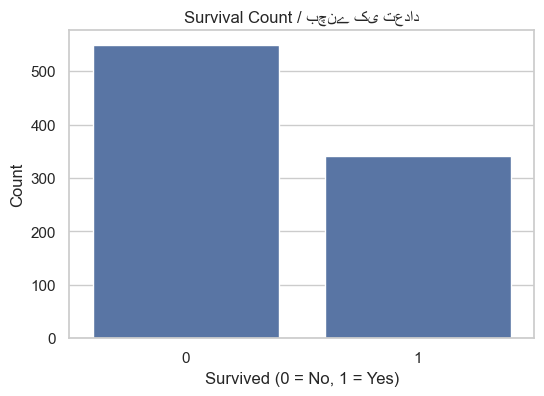

In [92]:
# -----------------------------
# 10️⃣ Visualization
# -----------------------------
sns.set(style="whitegrid")

# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count / بچنے کی تعداد")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


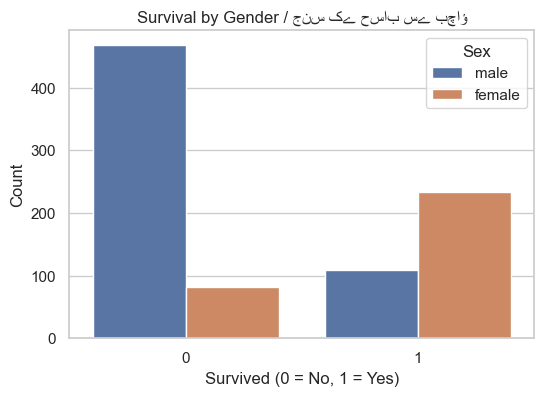

In [93]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Gender / جنس کے حساب سے بچاؤ")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

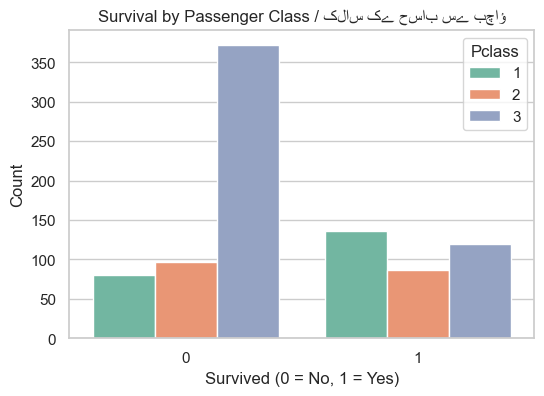

In [94]:
# Survival by Class
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Pclass", data=df, palette="Set2")
plt.title("Survival by Passenger Class / کلاس کے حساب سے بچاؤ")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


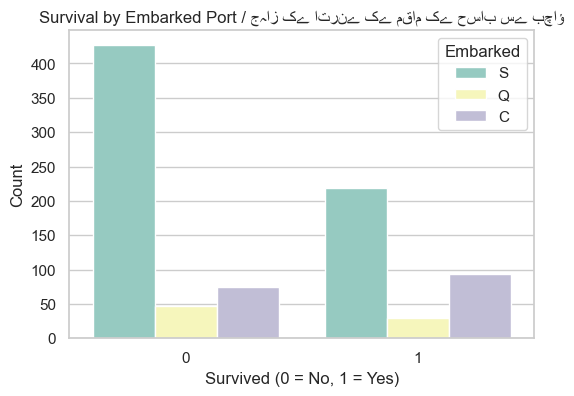

In [95]:
# Optional: Survival by Embarked
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Embarked", data=df, palette="Set3")
plt.title("Survival by Embarked Port / جہاز کے اترنے کے مقام کے حساب سے بچاؤ")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [99]:
# -----------------------------
# 11️⃣ Descriptive stats
# -----------------------------

# After dropping useless columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [100]:
print("\nDescriptive statistics (numerical columns):")
print(df[numerical_cols].describe())

print("\nDescriptive statistics (categorical columns):")
print(df[categorical_cols].describe())


Descriptive statistics (numerical columns):
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Descriptive statistics (categorical columns):
         Sex Embarked Pclass_category
count    891      891             891
unique     2        3               3
top     male        S             Low
freq     577      646             491


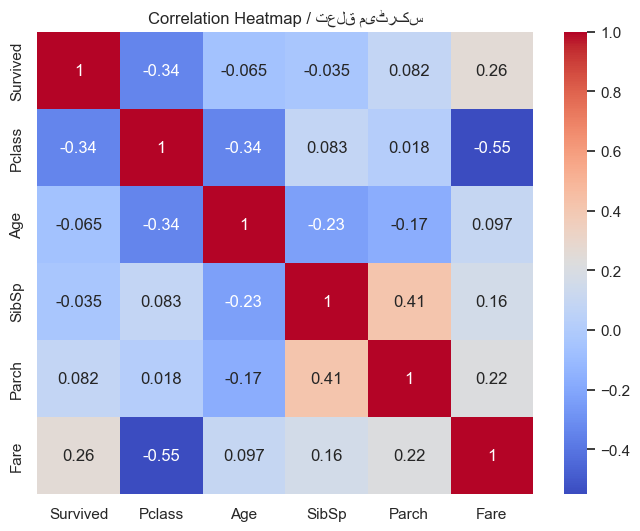

In [104]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap / تعلق میٹرکس")
plt.show()


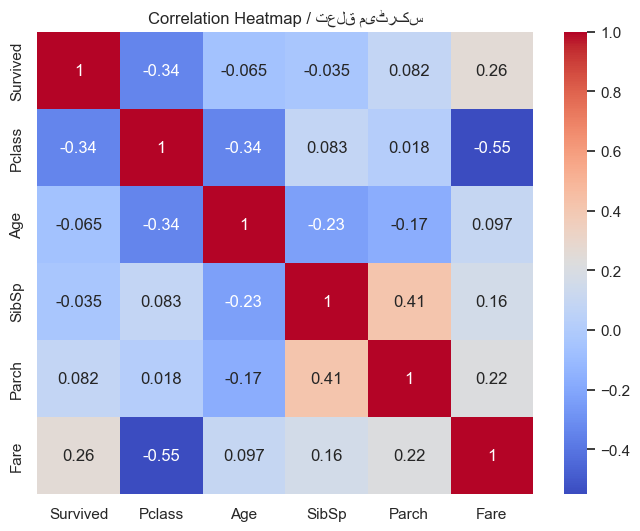

In [102]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap / تعلق میٹرکس")
plt.show()


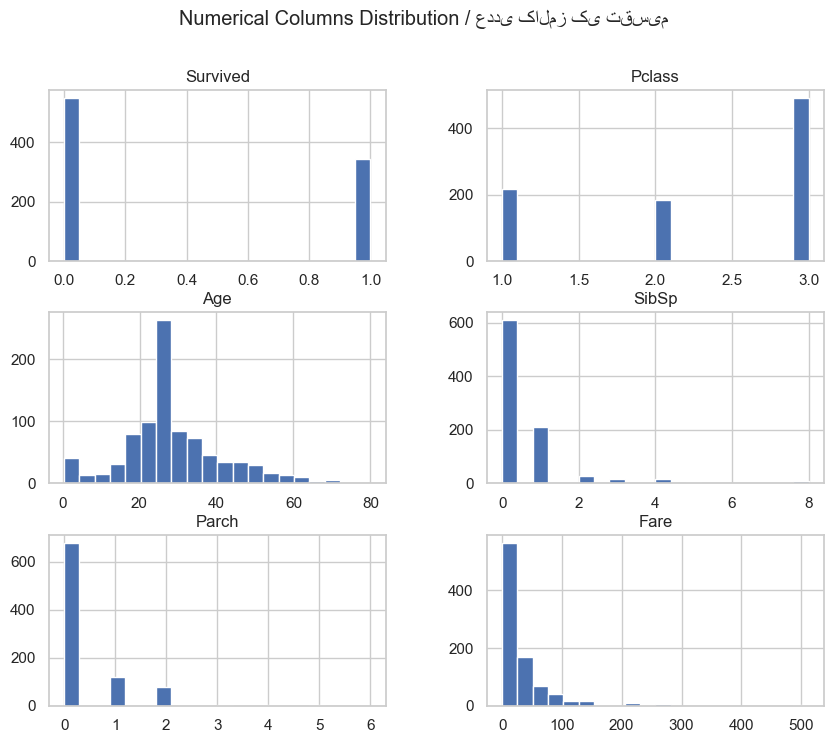

In [103]:
# -----------------------------
# 13️⃣ Histograms
# -----------------------------
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Numerical Columns Distribution / عددی کالمز کی تقسیم")
plt.show()
